<h1> CS753 Assignment 2 Data Stream Algorithms</h1>



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import math
from collections import Counter, defaultdict
import statistics
import random
import time
import itertools


<h2> Part I: Brute Force Approach and Performance Evaluation [15 pts]</h2>

<h3> (a) Compute the average frequency of the tracks/songs in the data stream. [5 pts] </h3>


In [3]:
# load data using Python JSON module
with open(r'...challenge_set.json') as f:
    data = json.loads(f.read())
    
# Normalizing data in playlist
df = pd.json_normalize(data, record_path =['playlists'])
#print(df.tail(5))

# append all track_name in column tracks to list nm_list
uri_list =[]
for playlist in data['playlists']:
    for track in playlist['tracks']:
        trackuri = track.get('track_uri')
        if bool(trackuri):
            uri_list.append(trackuri)

## Average frequency per song
print("Total number of tracks: ",len(uri_list))
print("unique sound tracks: ", len(list(set(uri_list))))
print("Average frequency per song: ", round(len(uri_list)/len(list(set(uri_list))),2))


Total number of tracks:  281000
unique sound tracks:  66243
Average frequency per song:  4.24


<h3>(b) Compute the frequencies of all tracks. Please report the frequencies of all tracks in
descending order to see the true distributional skewness. [10 pts]</h3>


=== ACTUAL TOP 20 RANKS ===

1 spotify:track:7yyRTcZmCiyzzJlNzGC9Ol 226
2 spotify:track:5dNfHmqgr128gMY2tc5CeJ 222
3 spotify:track:5XJJdNPkwmbUwE79gv0NxK 215
4 spotify:track:62vpWI1CHwFy7tMIcSStl8 211
5 spotify:track:7BKLCZ1jbUBVqRi2FVlTVw 206
6 spotify:track:7KXjTSCq5nL1LoYtL7XAwS 202
7 spotify:track:27GmP9AWRs744SzKcpJsTZ 198
8 spotify:track:1xznGGDReH1oQq0xzbwXa3 197
9 spotify:track:0v9Wz8o0BT8DU38R4ddjeH 196
10 spotify:track:4Km5HrUvYTaSUfiSGPJeQR 186
11 spotify:track:5hTpBe8h35rJ67eAWHQsJx 184
12 spotify:track:3a1lNhkSLSkpJE4MSHpDu9 180
13 spotify:track:0SGkqnVQo9KPytSri1H6cF 174
14 spotify:track:7oK9VyNzrYvRFo7nQEYkWN 171
15 spotify:track:0XUfyU2QviPAs6bxSpXYG4 171
16 spotify:track:1AhDOtG9vPSOmsWgNW0BEY 167
17 spotify:track:6O6M7pJLABmfBRoGZMu76Y 164
18 spotify:track:5NQbUaeTEOGdD6hHcre0dZ 160
19 spotify:track:343YBumqHu19cGoGARUTsd 160
20 spotify:track:2KpCpk6HjXXLb7nnXoXA5O 159


Text(0, 0.5, 'Frequency per track')

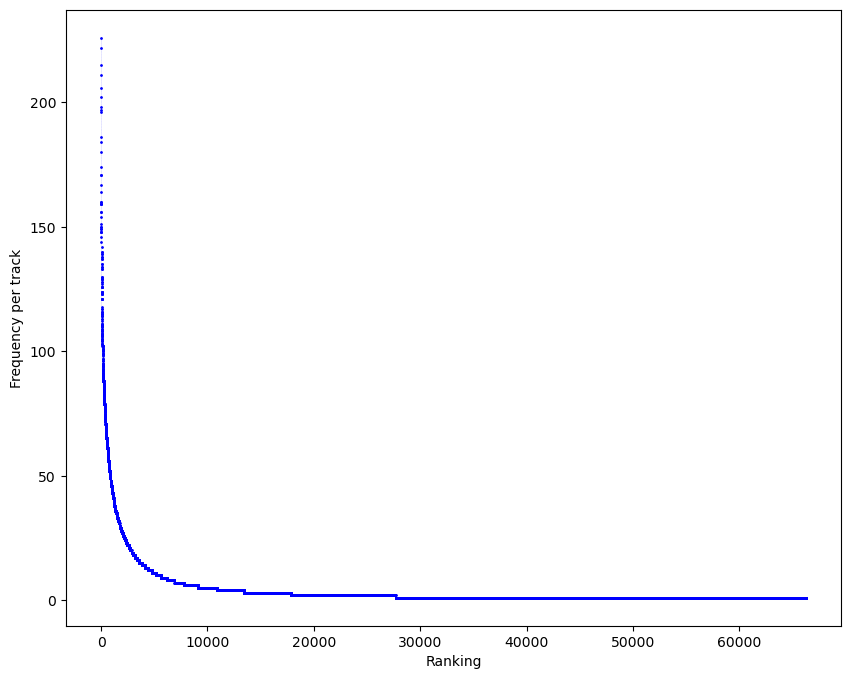

In [4]:
total_tracks = len(list(set(uri_list)))
nm_counts = Counter(uri_list)
print("")
print ("=== ACTUAL TOP 20 RANKS ===")
print("")
ranking=[]
track_uri=[]
actual_counts=[]
for rank, token in enumerate(sorted(nm_counts, key=nm_counts.get, reverse=True)):
    rank += 1
    if rank <= 20:
        print(rank, token, nm_counts[token])
    ranking.append(rank)
    track_uri.append(token)
    actual_counts.append(nm_counts[token])

## plot frequency of track against ranking 
plt.figure(figsize=(10,8))
plt.plot(ranking,actual_counts,color='blue', marker='o', linestyle='dashed',linewidth=0.1, markersize=1)
plt.xlabel("Ranking")
plt.ylabel("Frequency per track")    

<h2>Part II: Miisra-Gries Approach and Performance Evaluation [40 pts]</h2>

(a) Implement Misra-Gries summary to find the most frequent tracks. Please report the plot of the estimated frequencies in descending order to see the approximation skewness. (Please clearly state your chosen parameters.) [25 pts]  
<h3>
I set K as 50000 which is about 18% of original tracks because it shows the least average relative error as shown in partIII (c). The resulting freqency plot is less skewed comparing to the actual prequency plot due to MG approximation approach.</h3>

=== MISRA GRIES TOP 20 RANKS ===

1 spotify:track:7yyRTcZmCiyzzJlNzGC9Ol 87
2 spotify:track:5dNfHmqgr128gMY2tc5CeJ 83
3 spotify:track:5XJJdNPkwmbUwE79gv0NxK 80
4 spotify:track:62vpWI1CHwFy7tMIcSStl8 72
5 spotify:track:7BKLCZ1jbUBVqRi2FVlTVw 67
6 spotify:track:7KXjTSCq5nL1LoYtL7XAwS 63
7 spotify:track:27GmP9AWRs744SzKcpJsTZ 60
8 spotify:track:0v9Wz8o0BT8DU38R4ddjeH 59
9 spotify:track:1xznGGDReH1oQq0xzbwXa3 58
10 spotify:track:4Km5HrUvYTaSUfiSGPJeQR 47
11 spotify:track:5hTpBe8h35rJ67eAWHQsJx 46
12 spotify:track:3a1lNhkSLSkpJE4MSHpDu9 41
13 spotify:track:0SGkqnVQo9KPytSri1H6cF 35
14 spotify:track:0XUfyU2QviPAs6bxSpXYG4 33
15 spotify:track:7oK9VyNzrYvRFo7nQEYkWN 32
16 spotify:track:1AhDOtG9vPSOmsWgNW0BEY 28
17 spotify:track:6O6M7pJLABmfBRoGZMu76Y 25
18 spotify:track:5NQbUaeTEOGdD6hHcre0dZ 21
19 spotify:track:6eT7xZZlB2mwyzJ2sUKG6w 21
20 spotify:track:343YBumqHu19cGoGARUTsd 21


Text(0, 0.5, 'MISRA GRIES Frequency per track')

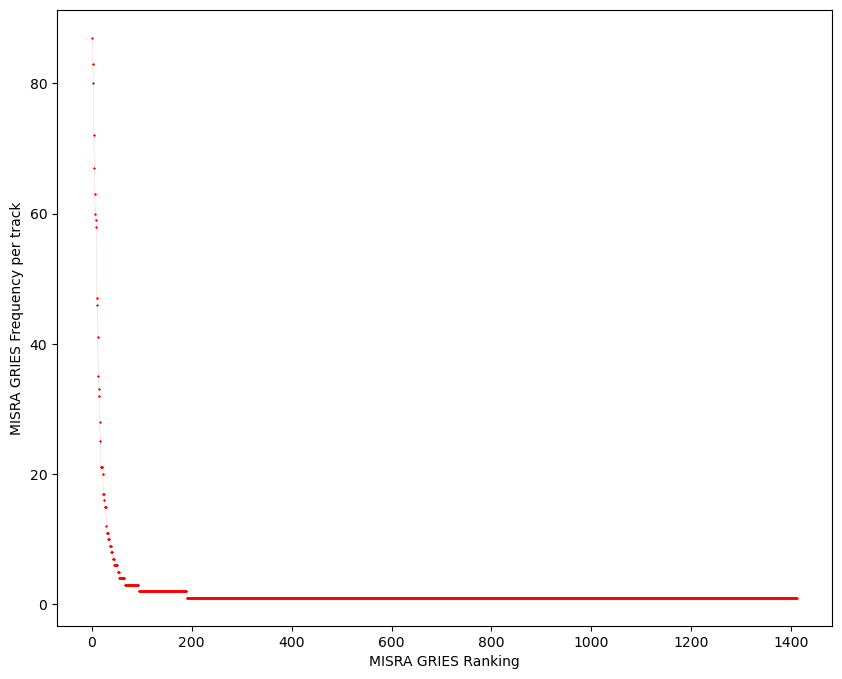

In [52]:
print ("=== MISRA GRIES TOP 20 RANKS ===")
print ("")

K = 2000
track_counts = defaultdict(int)
for token in uri_list:
    if len(track_counts.keys()) < K:
        track_counts[token] += 1
    elif token in track_counts:
        track_counts[token] += 1
    else:
        for key in list(track_counts):
            track_counts[key] -= 1
            if track_counts[key] == 0:
                del track_counts[key]
ranking_MG=[]
track_uri_MG=[]
track_counts_MG=[]                
for rank, token in enumerate(sorted(track_counts, key=track_counts.get, reverse=True)):
    rank += 1
    if rank <=20:
        print (rank, token, track_counts[token])
    ranking_MG.append(rank)
    track_uri_MG.append(token)
    track_counts_MG.append(track_counts[token])        


# plot Misra Gries frequency of tracks against ranking
plt.figure(figsize=(10,8))
plt.plot(ranking_MG, track_counts_MG,color='red', marker='x', linestyle='dashed',linewidth=0.1, markersize=1)
plt.xlabel("MISRA GRIES Ranking")
plt.ylabel("MISRA GRIES Frequency per track")  



(b) Compare the estimated frequency of all tracks from the generated Misra-Gries summary with their true frequencies from Part I(b). In particular, please report the plot of the relative error for all tracks with the estimated frequencies in descending order by Misra-Gries approach with the same parameters in Part II(a). (Note: relative error is 𝑟𝑒𝑙_𝑒𝑟𝑟𝑜𝑟20 = 1 − 𝑒𝑠𝑡𝑖𝑚𝑎𝑡𝑒𝑑_𝑓𝑟𝑒𝑞/𝑡𝑟𝑢𝑒_𝑓𝑟𝑒𝑞 ) [5 pts] 

Top 20 frequency with relative error:
    actual_rank                            track_name  true_frequency  \
0             1  spotify:track:7yyRTcZmCiyzzJlNzGC9Ol             226   
1             2  spotify:track:5dNfHmqgr128gMY2tc5CeJ             222   
2             3  spotify:track:5XJJdNPkwmbUwE79gv0NxK             215   
3             4  spotify:track:62vpWI1CHwFy7tMIcSStl8             211   
4             5  spotify:track:7BKLCZ1jbUBVqRi2FVlTVw             206   
5             6  spotify:track:7KXjTSCq5nL1LoYtL7XAwS             202   
6             7  spotify:track:27GmP9AWRs744SzKcpJsTZ             198   
7             8  spotify:track:1xznGGDReH1oQq0xzbwXa3             197   
8             9  spotify:track:0v9Wz8o0BT8DU38R4ddjeH             196   
9            10  spotify:track:4Km5HrUvYTaSUfiSGPJeQR             186   
10           11  spotify:track:5hTpBe8h35rJ67eAWHQsJx             184   
11           12  spotify:track:3a1lNhkSLSkpJE4MSHpDu9             180   
12           

Text(0, 0.5, 'Relative Error of Frequency')

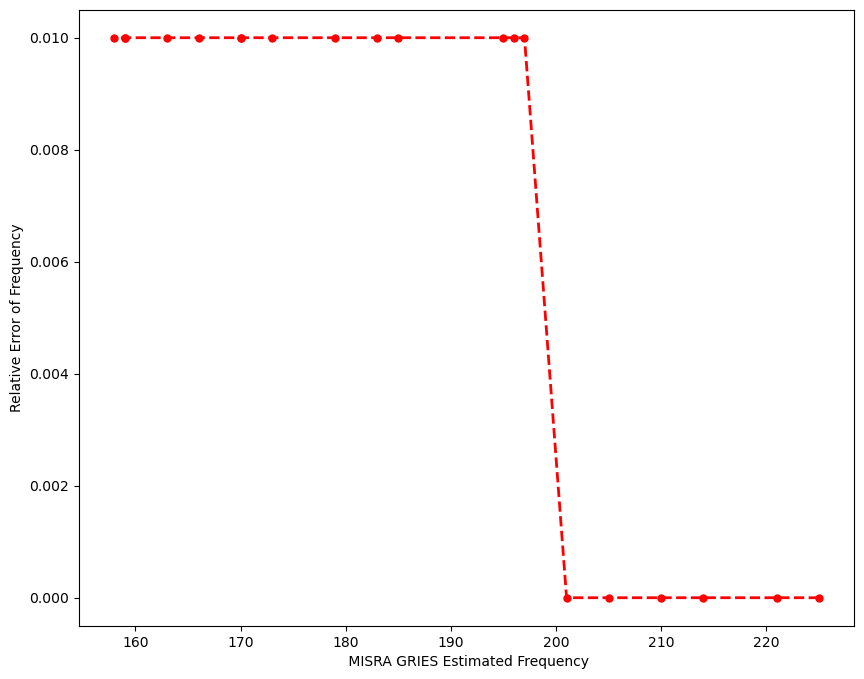

In [133]:
## save ranking,track_uri,track_counts as dataframe df_actual
df_actual = pd.DataFrame(list(zip(ranking, track_uri, actual_counts)),columns=["rank","track_uri","actual_counts"])

## save ranking_MG,track_uri_MG,track_counts_MG as dataframe df_MG
df_MG =pd.DataFrame(list(zip(ranking_MG,track_uri_MG,track_counts_MG)),columns=["rank","track_uri_MG","MG_counts"])

# Merge df_actual frequency and df_MG frequency, calculate the relative error of frequencies

df_merge = pd.merge(df_actual,df_MG, left_on = "track_uri",right_on ="track_uri_MG")

df_merge['rel_error'] =  round(1 - (df_merge['MG_counts'] / df_merge['actual_counts']),2)  
df_merge.rename(columns = {'rank_x':'actual_rank','rank_y':'MG_rank','track_uri':'track_name',
                           'actual_counts':'true_frequency','MG_counts':'MG_estimated_frequency'}, inplace = True)

print("Top 20 frequency with relative error:")
print(df_merge.head(20))

# plot relative errors in descending order
plt.figure(figsize=(10,8))
plt.plot(df_merge['MG_estimated_frequency'][0:20].sort_values(ascending=False),df_merge['rel_error'][0:20],
         color='red', marker='o',linestyle='dashed',linewidth=2, markersize=5)
plt.xlabel(" MISRA GRIES Estimated Frequency")
plt.ylabel("Relative Error of Frequency")  

(c) Run your Misra-Gries summary and report the number of decrement steps with your chosen parameter [10 pts]

In [8]:
print("m= ", len(uri_list), "m'= ", len(track_uri_MG), "k= ", K, "Max decrement steps: ",
      math.ceil((len(uri_list)-len(track_uri_MG))/(K+1)) )

m=  281000 m'=  1411 k=  2000 Max decrement steps:  140
139.7246376811594


<font size="4"> **Part III: Count Sketch Approach and Performance Evaluation [45 pts]** 

(a) Implement Count Sketch Algorithm to find the most frequent tracks. Please report the plot of
the estimated frequencies in descending order to see the approximation skewness. (Please
clearly state your chosen parameters.) [30 pts]</font>


In [21]:
# factuorzie track_uri to get a list of hashable values
df_uri = pd.DataFrame(uri_list,columns=['track_name'])
df_uri['hash_factor']=df_uri.track_name.factorize()[0]+1
print(len(df_uri['hash_factor']))

281000


-------------------------------------
Parameters of Count Sketch Algorithm:
-------------------------------------
Taking acount of  0.03162277660168379  allowed miscount and probablity of failure of  1e-15
I chosen d value:  15 , w value:  2000
time spend for Count Sketch: 4469.8216915130615ms


Text(0, 0.5, 'sketch count Frequency per track')

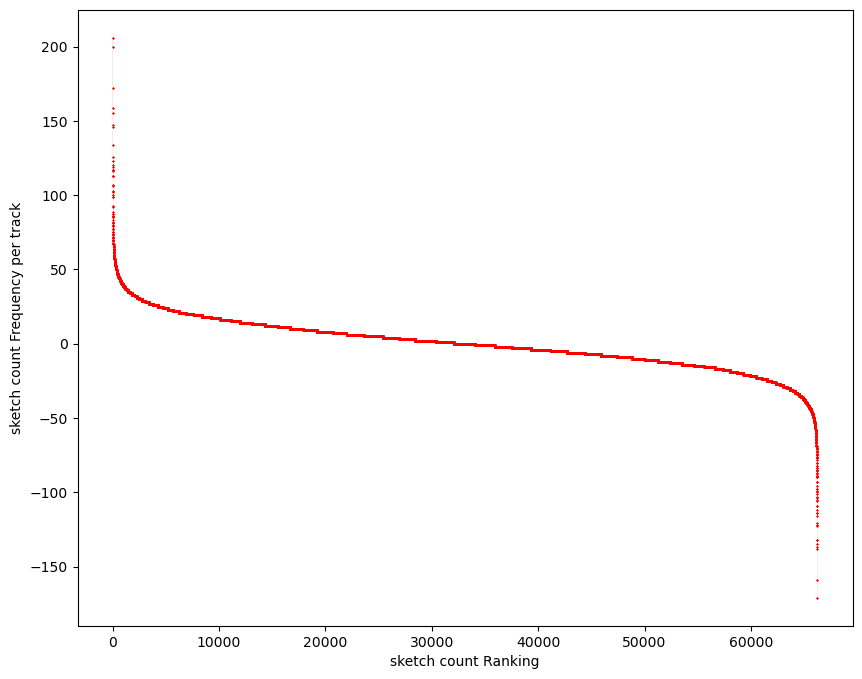

In [131]:
# factuorzie track_uri to get a list of hashable values
df_uri = pd.DataFrame(uri_list,columns=['track_name'])
df_uri['hash_factor']=df_uri.track_name.factorize()[0]+1
# coefficient generator for hash functions
def RandCoeffs(d,p):
    # Create a list of random values.
    randList_a = []
    randList_b = []
    while d >0:
        randIndex_a = random.randint(0, p) # coeff a >0 and < prime
        randIndex_b = random.randint(0, p) # coeff b >=0 and < prime
        # Ensure that each random number is unique.
        while randIndex_a in randList_a or randIndex_b in randList_b:
            randIndex_a = random.randint(0, p)
            randIndex_b = random.randint(0, p)        
        # Add the random number to the list.
        randList_a.append(randIndex_a)
        randList_b.append(randIndex_b)
        d = d - 1
    return [randList_a,randList_b]
# count sketch function
def count_sketch(series,d,w):
    data = series.tolist()
    table = np.zeros((d,w))
    frequency = []
    sign = [1,-1]
    prime = len(series)+81
    # generate hash coefficients
    randlistA,randlistB = RandCoeffs(d,prime)
    randlistC,randlistD = RandCoeffs(d,prime)
    # get hash value for position and sign, allocate -1/1 to associated pocket
    for i in range(len(data)):
        for j in range(d):
            hashvalue = ((data[i]*randlistA[j]+randlistB[j])%prime)%w
            signvalue = ((data[i]*randlistC[j]+randlistD[j])%prime)%2
            table[j,hashvalue] +=sign[signvalue]
    
    ## get positions of unique data in list and find 
    data_unique = list(set(data))
    freq_count =[]
    uri_factor=[]
    for m in range(len(data_unique)):
        frequency =[]        
        for n in range(d):
            m_hashvalue=((data_unique[m]*randlistA[n]+randlistB[n])%prime)%w
            frequency.append(table[n,m_hashvalue])
        freq_count.append(statistics.median(frequency))
        uri_factor.append(data_unique[m])
    ## store uri_factor and frequency in df
    df_sketch =pd.DataFrame(list(zip(uri_factor,freq_count)), columns=(['hash_factor','sketch_count']))
    return(df_sketch)

## sketch count results
d = 15
w = 2000
T1 = time.time()
df_sketch = count_sketch(df_uri['hash_factor'],d,w).sort_values(by=['sketch_count'],ascending=False)

df_sketch['rank']=df_sketch.hash_factor.factorize()[0]+1

print("-------------------------------------")
print("Parameters of Count Sketch Algorithm:")
print("-------------------------------------")
print("Taking acount of ", math.sqrt(2/w)," allowed miscount and probablity of failure of ", 1/(10**d))
print("I chosen d value: ", d, ", w value: ", w)

T2 = time.time()
print("time spend for Count Sketch: " + str((T2-T1)*1000) +"ms")
# plot sketch count frequency of tracks against ranking
plt.figure(figsize=(10,8))
plt.plot(df_sketch['rank'].sort_values(ascending=True),df_sketch['sketch_count'].
         sort_values(ascending=False),color='red', marker='x', linestyle='dashed',linewidth=0.1, markersize=1)
plt.xlabel("sketch count Ranking")
plt.ylabel("sketch count Frequency per track")  


(b) Compare the estimated frequency of all tracks with their true frequencies from Part I(b). In
particular, please report the plot of the relative error for all tracks with the estimated frequencies
in descending order by Count Sketch Algorithm with the same parameters in Part III(a). [5 pts]

     actual_rank  true_frequency  sketch_count_frequency  sketch_count_rank  \
1              2             222                   206.0                  1   
6              7             198                   200.0                  2   
3              4             211                   172.0                  3   
8              9             196                   159.0                  4   
4              5             206                   155.0                  5   
10            11             184                   147.0                  6   
14            15             171                   146.0                  7   
42            43             137                   134.0                  8   
0              1             226                   126.0                  9   
29            30             149                   123.0                 10   
33            34             146                   120.0                 11   
191          192              91                   1

Text(0, 0.5, 'Relative Error of Frequency')

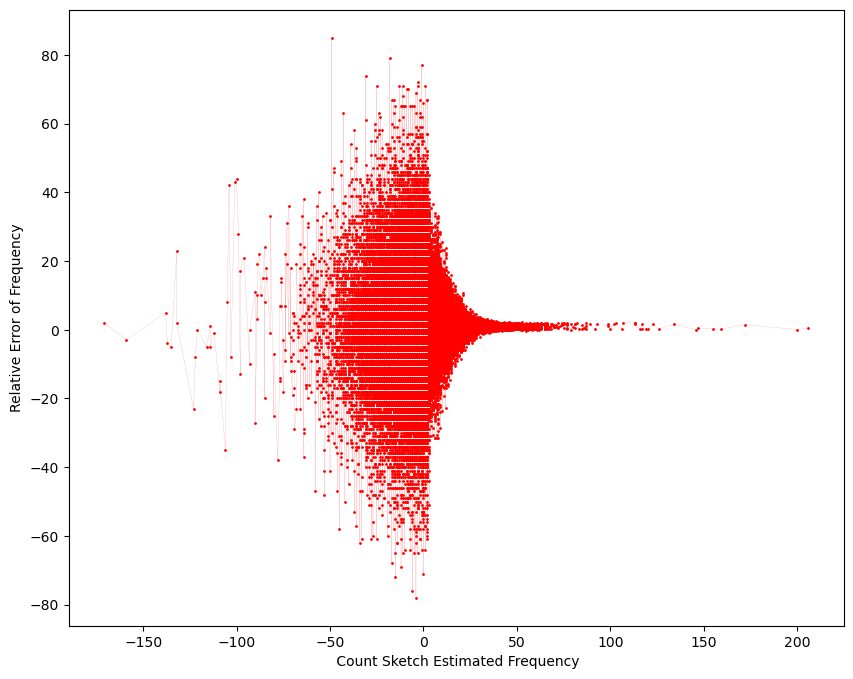

In [132]:
# merge sketch df with df containing track_uri info to get the track_name
df_sketch_merge = pd.merge(df_sketch,df_uri.drop_duplicates(), how = "inner",on = "hash_factor")
# merge df of actual counts with df of sketch count
merge_true_sketch = pd.merge(df_actual,df_sketch_merge,left_on = "track_uri",right_on ="track_name")

# calculate the relative errors
merge_true_sketch['rel_error'] =  round(1 - (merge_true_sketch['sketch_count'] / merge_true_sketch['actual_counts']),2)
merge_true_sketch= merge_true_sketch.drop(['hash_factor','track_uri'],axis=1)
merge_true_sketch.rename(columns = {'rank_y':'sketch_count_rank','rank_x':'actual_rank',
                           'actual_counts':'true_frequency','sketch_count':'sketch_count_frequency'}, inplace = True)
print(merge_true_sketch.sort_values(by=['sketch_count_rank'],ascending=True).head(20))
print(sum(merge_true_sketch['rel_error']))
# plot relative errors in descending order
plt.figure(figsize=(10,8))
plt.plot(merge_true_sketch['sketch_count_frequency'].sort_values(ascending=False),merge_true_sketch['rel_error'],
         color='red', marker='o',linestyle='dashed',linewidth=0.1, markersize=1)
plt.xlabel(" Count Sketch Estimated Frequency")
plt.ylabel("Relative Error of Frequency")  

(c) Explain the impact of the size of summary (𝑘) to the average relative error across all tracks
and the runtime by Misra-Gries Approach and Count Sketch Algorithm. Please suggest how you
would specify the value of k to achieve more accurate estimations and lesser estimation time,
respectively? [5 pts]

<font size="4">
For Misra_Gries approach, with increasing of k value (range 10000 - 65000), the relative average error is reducing, which is understable because K is close to the actual length of tracks.But when k is over 50K, the error does not reduce anymore but increase. The optimum K that I choose is 50,000, which is ~18% of total tracks, the total relative error is 0.17, close to zero. The estimated decrement steps are reduced from 27 to 4 steps. When increasing value K, the processing time does not show significant difference, all around 250-300ms.

For Count Sketch algorithm, K= d * w (number of hash functions X number of buckets). Over an optimum value of K, the total relative error reduces to close zero, but time for computation increases dramatically. From graph underlying, we can get the optimum threshold for K is 300000, which is ~ 1.1 times of the total size of original track 281K. When increasing number of hash function(d), the performance can be perserved, but computing time increases dramatically (about 1400ms per extra 5 hash functions). However, only increasing w but with fixed value of d, the computing time does not change significantly. Therefore I choose K value 15X20000 = 300,000. The total relative errors is 0.
    
The difference of Count Sketch and Misra Gries is that Count Sketch can approximate frequencies for all records, but Misra Gries can only approximate m' number of records, which is much less than the actual length of original tracks.
    
</font>

At dimension k =  10000 , total timespan for Count Sketch is  240.0  ms
m=  281000 m'=  8976 k=  10000 Max decrement steps:  27.2
At dimension k =  15000 , total timespan for Count Sketch is  237.0  ms
m=  281000 m'=  12897 k=  15000 Max decrement steps:  17.87
At dimension k =  20000 , total timespan for Count Sketch is  246.0  ms
m=  281000 m'=  16436 k=  20000 Max decrement steps:  13.23
At dimension k =  25000 , total timespan for Count Sketch is  239.0  ms
m=  281000 m'=  17501 k=  25000 Max decrement steps:  10.54
At dimension k =  30000 , total timespan for Count Sketch is  279.0  ms
m=  281000 m'=  14420 k=  30000 Max decrement steps:  8.89
At dimension k =  35000 , total timespan for Count Sketch is  266.0  ms
m=  281000 m'=  18803 k=  35000 Max decrement steps:  7.49
At dimension k =  40000 , total timespan for Count Sketch is  269.0  ms
m=  281000 m'=  29826 k=  40000 Max decrement steps:  6.28
At dimension k =  45000 , total timespan for Count Sketch is  279.0  ms
m=  28100

Text(0, 0.5, 'Average Relative Error of Misra Gries')

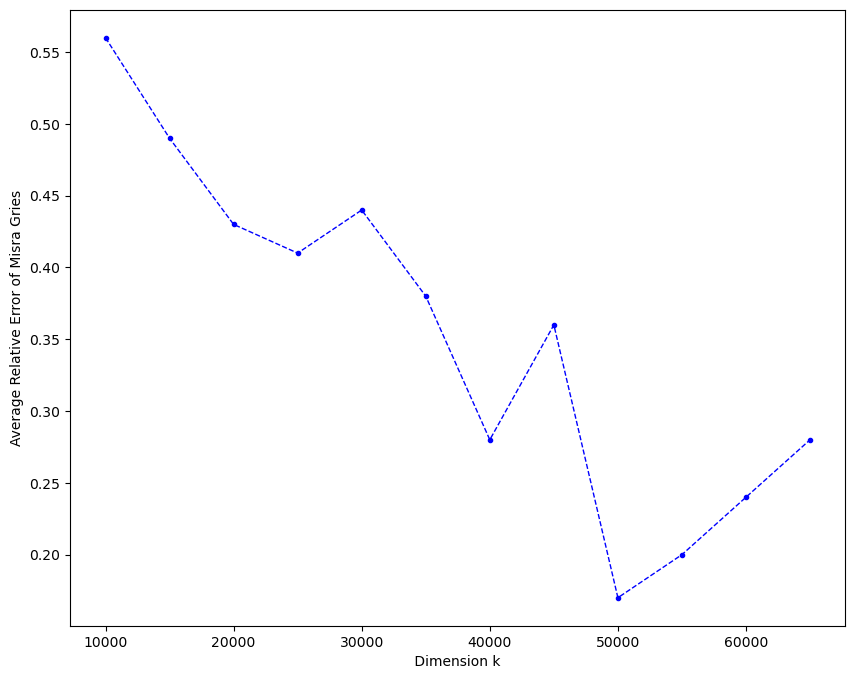

In [55]:
# imapct of k to performance of Misra Gries
df_actual = pd.DataFrame(list(zip(ranking, track_uri, actual_counts)),columns=["rank","track_uri","actual_counts"])
k= list(range(10000,70000,5000))
MG_time=[]
MG_totalerror=[]
for i in range(len(k)):
    T1 = time.time()
    track_counts = defaultdict(int)
    for token in uri_list:
        if len(track_counts.keys()) < k[i]:
            track_counts[token] += 1
        elif token in track_counts:
            track_counts[token] += 1
        else:
            for key in list(track_counts):
                track_counts[key] -= 1
                if track_counts[key] == 0:
                    del track_counts[key]
    ranking_MG=[]
    track_uri_MG=[]
    track_counts_MG=[]                
    for rank, token in enumerate(sorted(track_counts, key=track_counts.get, reverse=True)):
        rank += 1
        ranking_MG.append(rank)
        track_uri_MG.append(token)
        track_counts_MG.append(track_counts[token])
    df_MG =pd.DataFrame(list(zip(ranking_MG,track_uri_MG,track_counts_MG)),columns=["rank","track_uri_MG","MG_counts"])
    df_merge = pd.merge(df_actual,df_MG, left_on = "track_uri",right_on ="track_uri_MG")
    cum_error_MG =  sum(df_merge['MG_counts'] / df_merge['actual_counts'])
    T2 = time.time()
    MG_time.append((T2-T1)*1000)
    MG_totalerror.append(round(abs(1-cum_error_MG/len(df_merge)),2))
    print("At dimension k = ", k[i], ", total timespan for Count Sketch is ", round((T2-T1)*1000,0)," ms")
    print("m= ", len(uri_list), "m'= ", len(track_uri_MG), "k= ", k[i], "Max decrement steps: ",
      round((len(uri_list)-len(track_uri_MG))/(k[i]+1),2))

print("Total Errors: ", MG_totalerror)
print(len(df_actual))
plt.figure(figsize=(10,8))
plt.plot(k,MG_totalerror,color='blue', marker='o',linestyle='dashed',linewidth=1, markersize=3)
plt.xlabel(" Dimension k ")
plt.ylabel("Average Relative Error of Misra Gries")      


At dimension k =  15  X  1000  =  15000 , total timespan for Count Sketch is  4951.0  ms
 Total relative error : 1.02
At dimension k =  15  X  1500  =  22500 , total timespan for Count Sketch is  4721.0  ms
 Total relative error : 1.31
At dimension k =  15  X  2000  =  30000 , total timespan for Count Sketch is  4807.0  ms
 Total relative error : 0.93
At dimension k =  15  X  2500  =  37500 , total timespan for Count Sketch is  4683.0  ms
 Total relative error : 1.09
At dimension k =  15  X  3000  =  45000 , total timespan for Count Sketch is  4714.0  ms
 Total relative error : 1.1
At dimension k =  15  X  3500  =  52500 , total timespan for Count Sketch is  4689.0  ms
 Total relative error : 1.17
At dimension k =  15  X  4000  =  60000 , total timespan for Count Sketch is  4633.0  ms
 Total relative error : 1.01
At dimension k =  15  X  4500  =  67500 , total timespan for Count Sketch is  4704.0  ms
 Total relative error : 0.91


Text(0, 0.5, 'Average Relative Error of Count Sketch')

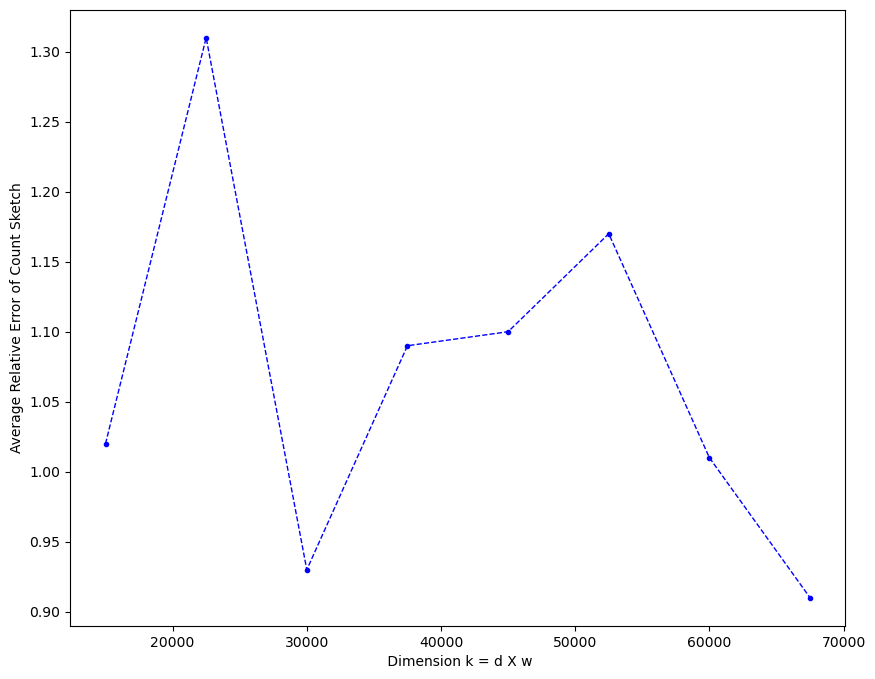

In [137]:
# impact w and d to performance of Count Sketch
#d = list(range(10,40,5))

w = list(range(1000,5000,500))
d = list(itertools.repeat(15, len(w)))
ck_time=[]
ck_dim=[]
ck_totalerror=[]
for i in range(len(d)):
    T1 = time.time()
    df_sketch = count_sketch(df_uri['hash_factor'],d[i],w[i]).sort_values(by=['sketch_count'],ascending=False)
    df_sketch_merge = pd.merge(df_sketch,df_uri.drop_duplicates(), how = "inner",on = "hash_factor")
    # merge df of actual counts with df of sketch count
    merge_true_sketch = pd.merge(df_actual,df_sketch_merge,left_on = "track_uri",right_on ="track_name")
    # calculate the relative errors
    cum_error =  sum(merge_true_sketch['sketch_count'] / merge_true_sketch['actual_counts'])
    T2 = time.time()
    ck_time.append((T2-T1)*1000)
    ck_dim.append(d[i]*w[i])
    ck_totalerror.append(round(abs(1-cum_error/len(merge_true_sketch)),2))
    print("At dimension k = ", d[i], " X ",w[i]," = ", d[i]*w[i], ", total timespan for Count Sketch is ",
          round((T2-T1)*1000,0)," ms")
    print(" Total relative error :",round(abs(1-cum_error/len(merge_true_sketch)),2) )


plt.figure(figsize=(10,8))
plt.plot(ck_dim,ck_totalerror,color='blue', marker='o',linestyle='dashed',linewidth=1, markersize=3)
plt.xlabel(" Dimension k = d X w")
plt.ylabel("Average Relative Error of Count Sketch")  

(d) Please report the top-20 frequent tracks by Miisra-Gries, and Count Sketch Algorithm,
respectively, along with (i) the track name, (ii) the estimation frequency, (iii) the true frequency,
(vi) the relative error per track. [5 pts]

In [134]:
## Misra Gries top 20 frequent tracks
print("---------------------------------------")
print("Misra Gries Top 20 estimated frequency")
print("---------------------------------------")
df_merge = df_merge[['track_name','MG_estimated_frequency','true_frequency','rel_error']]
print(df_merge.sort_values(by=['MG_estimated_frequency'],ascending=False).head(20))

print("---------------------------------------")
print("Count Sketch Top 20 estimated frequency")
print("----------------------------------------")
merge_true_sketch=merge_true_sketch[['track_name','sketch_count_frequency','true_frequency','rel_error']]
print(merge_true_sketch.sort_values(by=['sketch_count_frequency'],ascending=False).head(20))

---------------------------------------
Misra Gries Top 20 estimated frequency
---------------------------------------
                              track_name  MG_estimated_frequency  \
0   spotify:track:7yyRTcZmCiyzzJlNzGC9Ol                     225   
1   spotify:track:5dNfHmqgr128gMY2tc5CeJ                     221   
2   spotify:track:5XJJdNPkwmbUwE79gv0NxK                     214   
3   spotify:track:62vpWI1CHwFy7tMIcSStl8                     210   
4   spotify:track:7BKLCZ1jbUBVqRi2FVlTVw                     205   
5   spotify:track:7KXjTSCq5nL1LoYtL7XAwS                     201   
6   spotify:track:27GmP9AWRs744SzKcpJsTZ                     197   
7   spotify:track:1xznGGDReH1oQq0xzbwXa3                     196   
8   spotify:track:0v9Wz8o0BT8DU38R4ddjeH                     195   
9   spotify:track:4Km5HrUvYTaSUfiSGPJeQR                     185   
10  spotify:track:5hTpBe8h35rJ67eAWHQsJx                     183   
11  spotify:track:3a1lNhkSLSkpJE4MSHpDu9                     179 